In [18]:
import numpy as np
import pandas as pd
import os

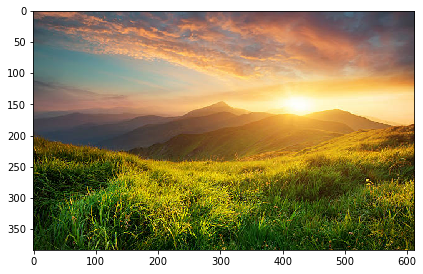

In [2]:
from skimage.io import imread,imshow
img1=imread(r"C:\Users\achin\Downloads\helloworld.jpg")
imshow(img1)

image translation

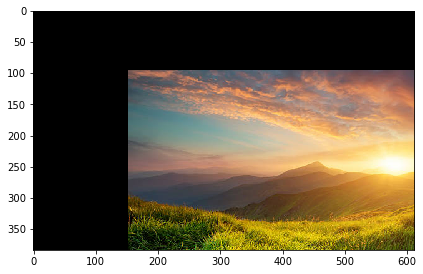

In [3]:
import cv2
import numpy as np
  
height, width = img1.shape[:2]
  
quarter_height, quarter_width = height / 4, width / 4
  
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])

img_translation = cv2.warpAffine(img1, T, (width, height))
imshow(img_translation)

image scaling

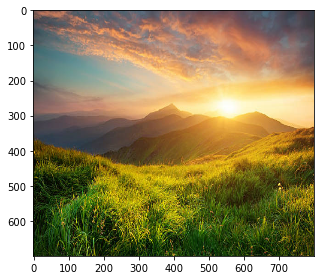

In [4]:
from skimage.transform import resize
img2=resize(img1,(700,800))
imshow(img2)

image rotation

In [5]:
pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=9ed6d66a34c3d216c74824b188aa9fdbd3ae92af338990f1e620728ccb4e5614
  Stored in directory: c:\users\achin\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


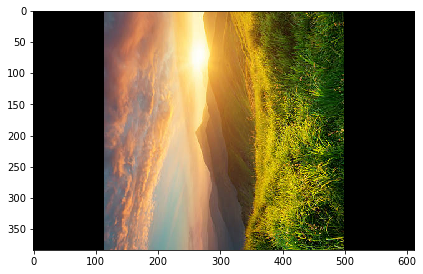

In [6]:
from PIL import Image
import imutils
rot_img = imutils.rotate(img1, angle=90)
imshow(rot_img)

image shrinking

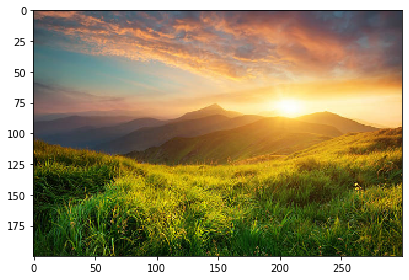

In [7]:
down_width = 300
down_height = 200
down_points = (down_width, down_height)
resize_down = cv2.resize(img1, down_points, interpolation= cv2.INTER_LINEAR)
imshow(resize_down)

image zooming

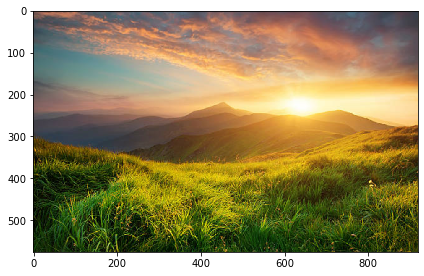

In [8]:
def zoom(img, zoom_factor=1.5):
    return cv2.resize(img, None, fx=zoom_factor, fy=zoom_factor)
zoomed = zoom(img1, 1.5)
imshow(zoomed)

In [9]:
img1.shape

(384, 612, 3)

1d conv

In [16]:
import tensorflow as tf
input_shape = (720,960,3)
x = tf.keras.utils.load_img(r"C:\Users\achin\Downloads\helloworld.jpg")
input_arr = tf.keras.preprocessing.image.img_to_array(x)
y = tf.keras.layers.Conv1D(34, 3, activation='relu',input_shape=input_shape[1:])(input_arr)

new=y[:,:,33].numpy()
imshow(new)

NameError: name 'tf' is not defined

2d conv

In [11]:
import numpy as np
class Conv_op:
    def __init__(self,num_filters,filter_size):
        self.num_filters =num_filters
        self.filter_size =filter_size
        self.conv_filter=np.random.randn(num_filters,filter_size,filter_size)/(filter_size *filter_size)

    def image_region(self,image):
        height,width=image.shape
        self.image=image
        for j in range(height-self.filter_size+1):
            for k in range(width-self.filter_size+1):
                image_patch=image[ j:(j+self.filter_size),k:(k+self.filter_size)]
                yield image_patch,j,k
                
    def forword_prop(self,image):
        height,width=image.shape
        conv_out=np.zeros(shape=(height-self.filter_size+1,width-self.filter_size+1,self.num_filters))
        for image_patch,i,j in self.image_region(image):
            conv_out[i,j]=np.sum(image_patch*self.conv_filter,axis=(1,2))
        return conv_out

        
    def back_prop(self,dL_dout,learning_rate):
        dL_dF_params=np.zeros(self.conv_filter.shape)
        for image_patch,i,j in self.image_region(self.image):
            for k in range(self.num_filters):
                dL_dF_params[k]+=image_patch*dL_dout[i,j,k]

        self.conv_filter-=learning_rate*dL_dF_params
        return dL_dF_params

In [12]:
conn=Conv_op(18,7)
img_grey=imread(r"C:\Users\achin\Downloads\helloworld.jpg",as_gray=True)
out=conn.forword_prop(img_grey)
out.shape

(378, 606, 18)

<function matplotlib.pyplot.show(close=None, block=None)>

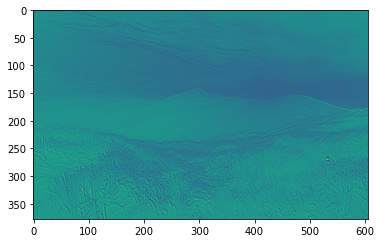

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(out[:,:,13])
plt.show

3*3 low and high pass filter

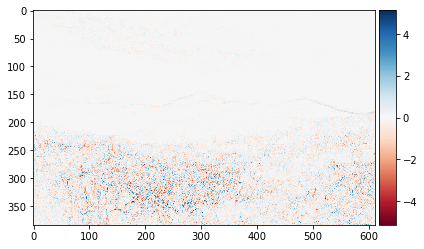

In [14]:
from scipy import ndimage
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
highpass = ndimage.convolve(img_grey, kernel)
imshow(highpass)

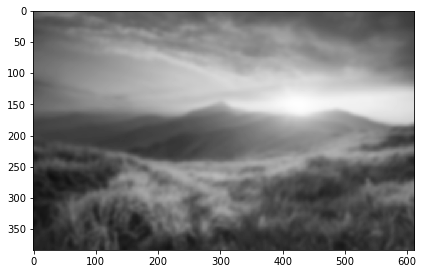

In [15]:
lowpass = ndimage.gaussian_filter(img_grey, 3)
imshow(lowpass)